# California housing price prediction using XGboost with Explainer (Lime/SHAP)

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor

data = pd.read_csv(r'C:\Users\tyeow\OneDrive - Intel Corporation\Desktop\MLLib\MLLib\Data\housing.csv')
data.dropna(axis=0, subset=['median_house_value'], inplace=True)
y = data.median_house_value
X = data.drop(['median_house_value'], axis=1).select_dtypes(exclude=['object'])
train_X, test_X, train_y, test_y = train_test_split(X.values, y.values, test_size=0.25)

my_imputer = SimpleImputer()
train_X = my_imputer.fit_transform(train_X)
test_X = my_imputer.transform(test_X)

my_model = XGBRegressor(n_estimators=1000, 
                        max_depth=5, 
                        learning_rate=0.1, 
                        subsample=0.7, 
                        colsample_bytree=0.8, 
                        colsample_bylevel=0.8, 
                        base_score=train_y.mean(), 
                        random_state=42, seed=42)
hist = my_model.fit(train_X, train_y, 
                    early_stopping_rounds=5, 
                    eval_set=[(test_X, test_y)], eval_metric='rmse', 
                    verbose=100)

[0]	validation_0-rmse:108115.41406
Will train until validation_0-rmse hasn't improved in 5 rounds.
[100]	validation_0-rmse:50480.41016
Stopping. Best iteration:
[123]	validation_0-rmse:49804.05078



In [23]:
test_pred = my_model.predict(test_X)
errors = test_pred - test_y
sorted_errors = np.argsort(abs(errors))
worse_5 = sorted_errors[-5:]
best_5 = sorted_errors[:5]

print(pd.DataFrame({'worse':errors[worse_5]}))
print()
print(pd.DataFrame({'best':errors[best_5]}))

           worse
0 -300178.281250
1 -304162.109375
2 -307553.859375
3 -309853.156250
4 -319548.375000

        best
0   7.937500
1  -8.867188
2   9.000000
3  17.656250
4 -19.312500


In [24]:
import lime
import lime.lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(train_X, feature_names=X.columns, class_names=['SalePrice'], verbose=True, mode='regression')

In [25]:
i = worse_5[0]
print('Error =', errors[i])
exp = explainer.explain_instance(test_X[i], my_model.predict, num_features=10)
exp.show_in_notebook(show_table=True)

Error = -300178.28125
Intercept 262560.97921160934
Prediction_local [195430.71430518]
Right: 199821.72


### Visualization on the feature splitting and model explainer for worse data points

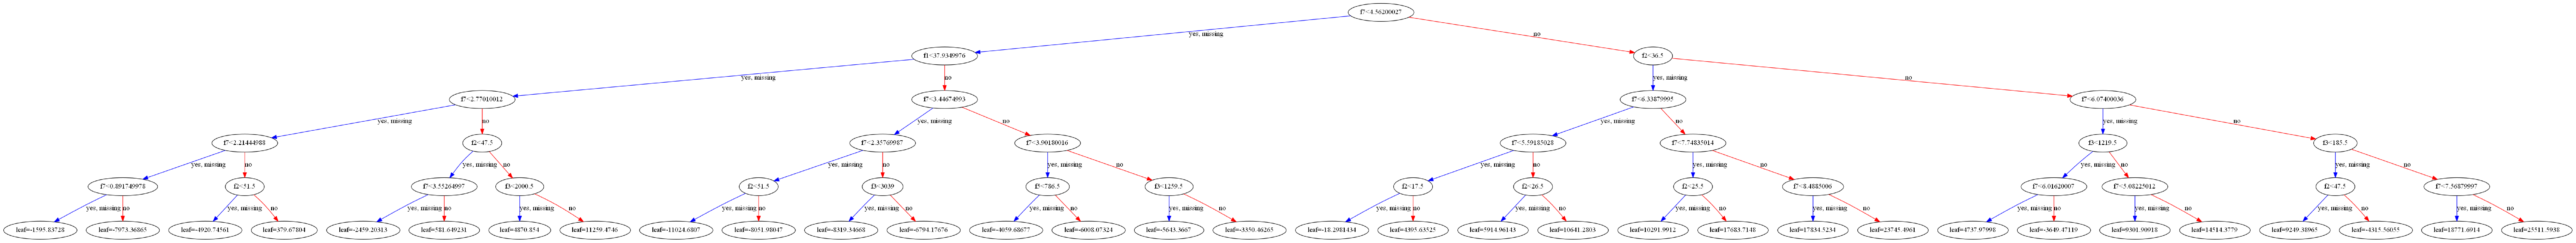

In [34]:
import os
import xgboost
import matplotlib.pyplot as plt
os.environ["PATH"] += os.pathsep + r'C:\Program Files (x86)\Graphviz2.38\bin'
xgboost.plot_tree(my_model,num_trees=1)
plt.rcParams['figure.figsize'] = [200, 200]
plt.show()

In [16]:
import shap

xgExplainer = shap.KernelExplainer(my_model.predict,train_X)
xgExplainer_val = xgExplainer.shap_values(train_X)

# shap.dependence_plot("Drumbeat", shap_values, X_test)
shap.summary_plot(xgExplainer_val, train_X)


Using 15480 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


KeyboardInterrupt: 